# PV Mismatch Simulation

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from pvmismatch import pvsystem
from pv_system import create_std_system, create_Rsh_degraded_system, create_Rs_degraded_system, plot_pv_system
from mismatch_models import remove_modules

### Example 1: Basic system

Pmp: 16849.723929502612  Vmp: 1054.9532123009726  Imp: 15.972010638037164


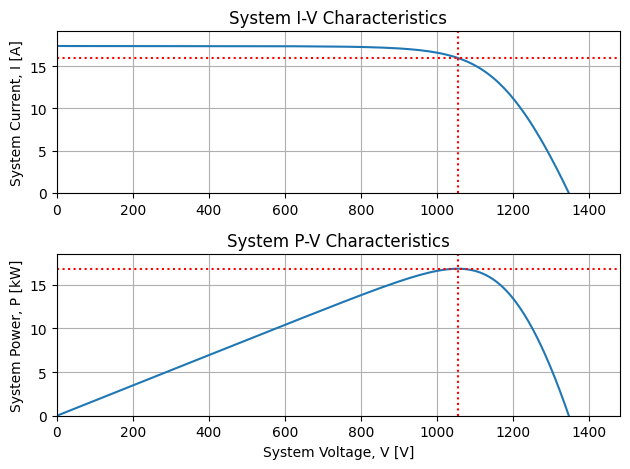

In [3]:
pvsys1 = create_std_system(num_strings=2, num_modules=30)
print("Pmp:", pvsys1.Pmp, " Vmp:", pvsys1.Vmp, " Imp:", pvsys1.Imp)
ex1 = pvsys1.plotSys()
plt.tight_layout()

### Example 2: Single module shading

Pmp after shading: 16516.783976274466
Imp after shading: 15.968366801150461
Vmp after shading: 1034.3439740552863


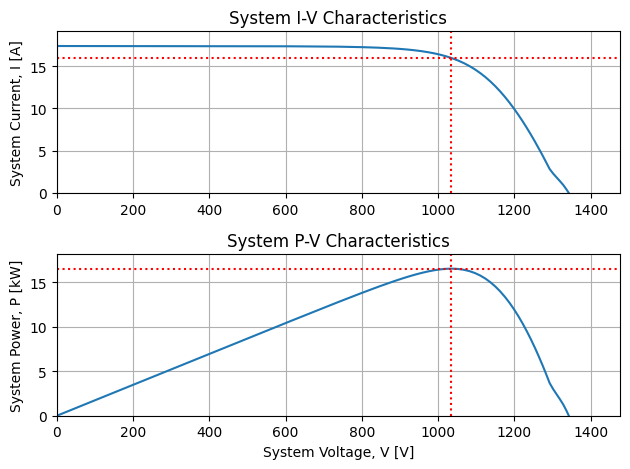

In [10]:
pvsys2 = create_std_system()
pvsys2.setSuns(Ee={0: {10: 0.01}})   # set module 10, string 0 to 10% irradiance
print("Pmp after shading:", pvsys2.Pmp)
print("Imp after shading:", pvsys2.Imp)
print("Vmp after shading:", pvsys2.Vmp)
ex2 = pvsys2.plotSys()
plt.tight_layout()

### Example 3: Partial shading & heating

Irradiance [%]: 10 || Temps [deg C]: 50
Pmp after partial shading & heating: 16705.13807111383
Imp after partial shading & heating: 15.955818079793161
Vmp after partial shading & heating: 1046.9621794115105


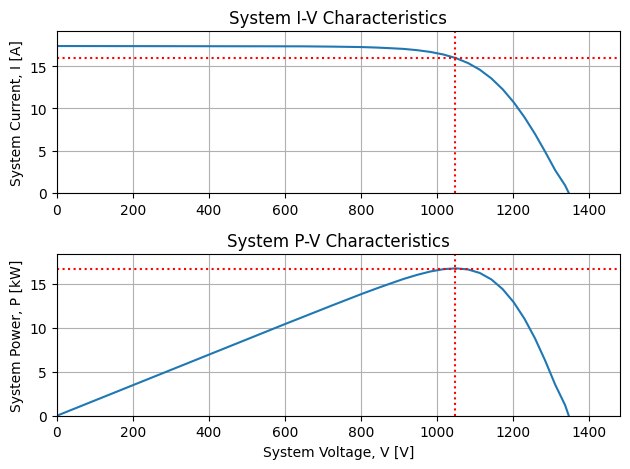

In [26]:
pvsys3 = create_std_system()
# set cells 0-5 in module 10, string 1 to 10% irradiance
pvsys3.setSuns(Ee={1: {10: {'cells':(0,1,2,3,4,5), 'Ee':(0.1,0.1,0.1,0.1,0.1,0.1)}}})
# set temperatures to 50 deg C
pvsys3.setTemps(Tc={1: {10:{'cells':(0,1,2,3,4,5), 'Tc':(323.15,323.15,323.15,323.15,323.15,323.15)}}})

# Alternative
# pvsys3.setSuns({0: {0: [(0.2,)*8, (0,1,2,3,4,5,6,7)]}})
# pvsys3.setTemps({0:{0:[(100.0+273.15,)*8, (0,1,2,3,4,5,6,7)]}})

print("Irradiance [%]:", 10, "|| Temps [deg C]:", 50)
print("Pmp after partial shading & heating:", pvsys3.Pmp)
print("Imp after partial shading & heating:", pvsys3.Imp)
print("Vmp after partial shading & heating:", pvsys3.Vmp)
ex3 = pvsys3.plotSys()
plt.tight_layout()

### Example 4: Module removal

Module equivalent loss: 0.23970773508486481
Pmp after module removal: 14830.219349529452
Imp after module removal: 15.91584471150768
Vmp after module removal: 931.789648513391


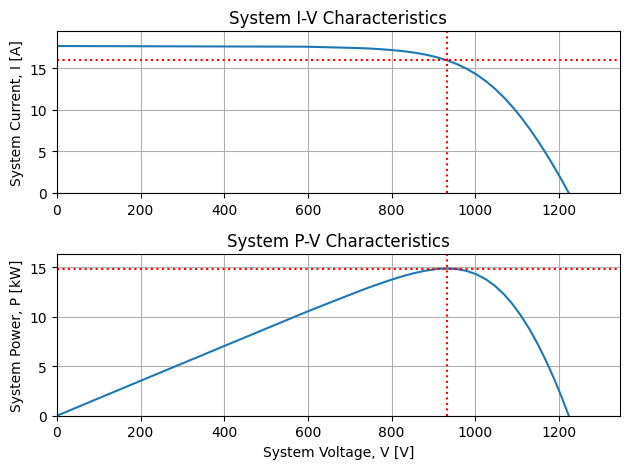

In [42]:
pvsys4 = create_std_system()
# remove last module of string 0
pvsys_rmvd = remove_modules(pvsys4, n_missing=1, strings_with_missing=1)
module_eq_diff = (pvsys4.Pmp - pvsys_rmvd.Pmp) / (pvsys4.Pmp/len(pvsys4.numberMods))
print("Module equivalent loss:", module_eq_diff)
print("Pmp after module removal:", pvsys_rmvd.Pmp)
print("Imp after module removal:", pvsys_rmvd.Imp)
print("Vmp after module removal:", pvsys_rmvd.Vmp)
ex4 = pvsys_rmvd.plotSys()
plt.tight_layout()

### Example 5: Module Equivalent Loss of 1 Affected Module (as a function of string size)

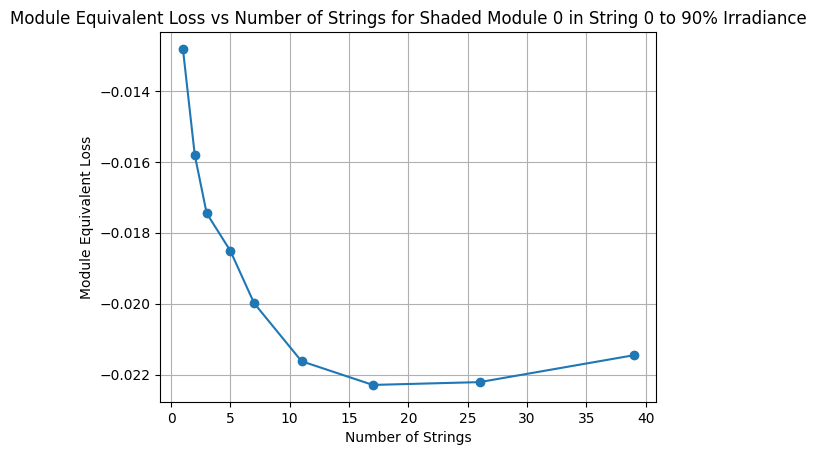

In [45]:
num_strings_list = np.unique(np.logspace(0, np.log10(40), num=10, dtype=int))
module_eq_diff_list = []

for num_strings in num_strings_list:
    sys = create_std_system(num_strings=num_strings)
    # shade module 0 in string 0 to 90% irradiance
    sys.setSuns({0:{0:0.9}})
    diff = (sys.Pmp - create_std_system(num_strings=num_strings).Pmp) / (sys.Pmp / len(sys.numberMods))
    module_eq_diff_list.append(diff)

plt.figure()
plt.plot(num_strings_list, module_eq_diff_list, 'o-')
plt.title("Module Equivalent Loss vs Number of Strings for Shaded Module 0 in String 0 to 90% Irradiance")
plt.xlabel("Number of Strings")
plt.ylabel("Module Equivalent Loss")
plt.grid()

### Example 6: Healthy vs Exponentially Degraded System

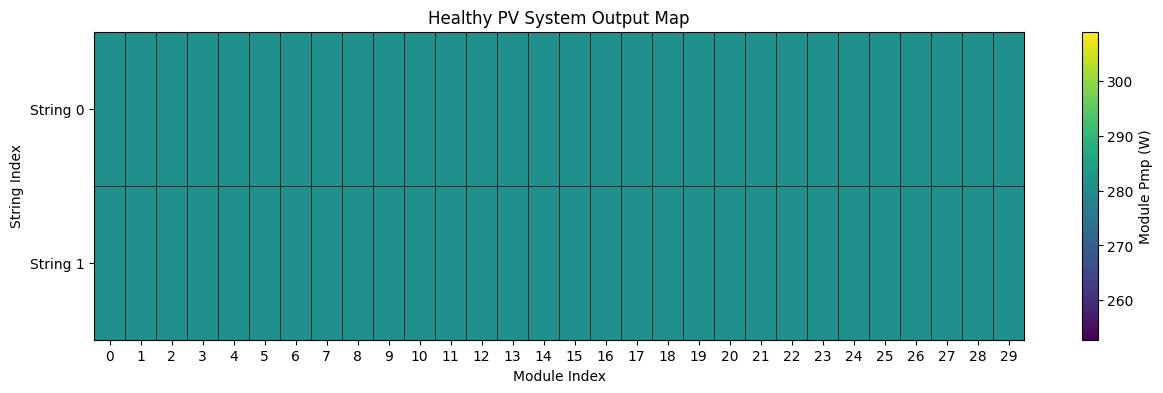

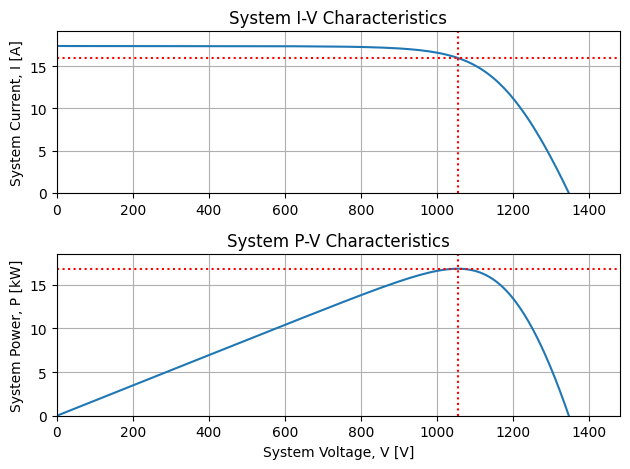

In [46]:
# Healthy system
pvsys_healthy = create_std_system()
plot_pv_system(pvsys_healthy, title="std")
pvsys_healthy.plotSys()
plt.tight_layout()
plt.show()

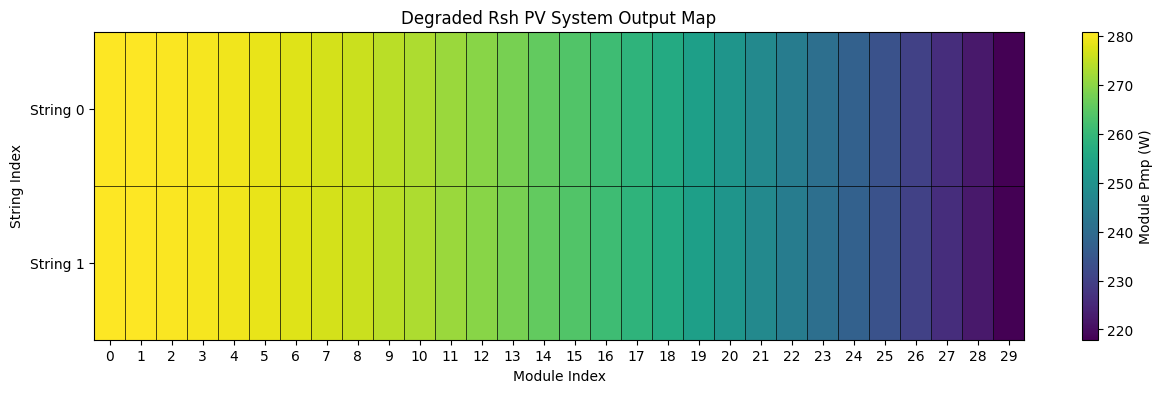

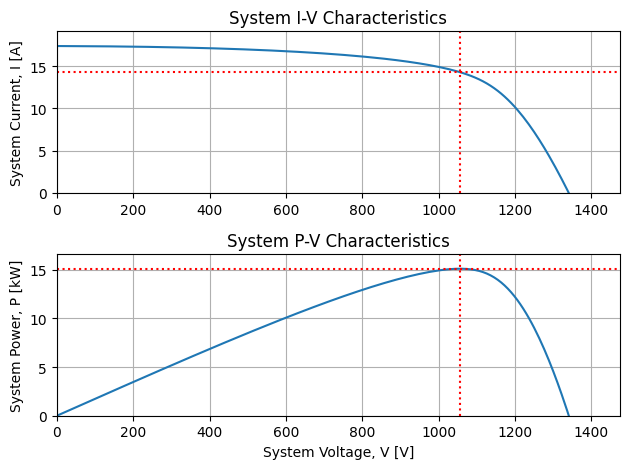

In [47]:
# Exponentially degraded Rsh system
pvsys_Rsh_degraded = create_Rsh_degraded_system()
plot_pv_system(pvsys_Rsh_degraded, title="Rsh")
pvsys_Rsh_degraded.plotSys()
plt.tight_layout()
plt.show()

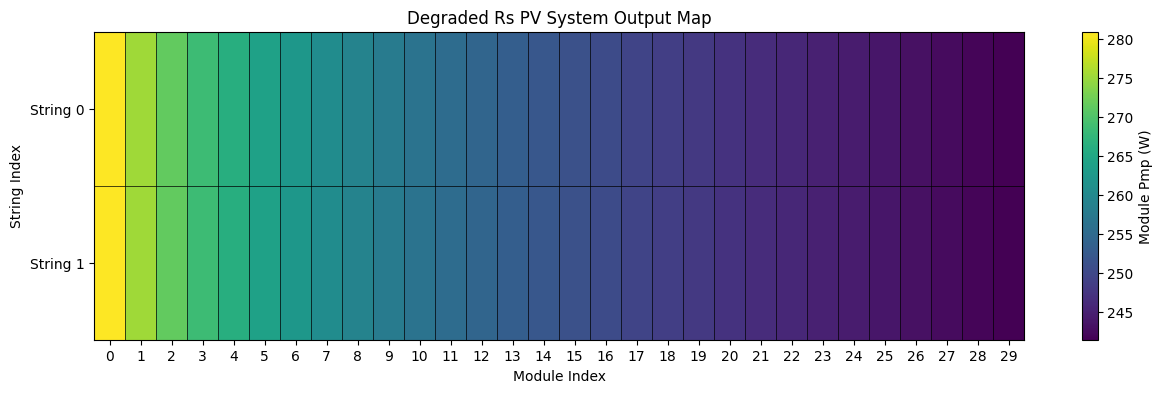

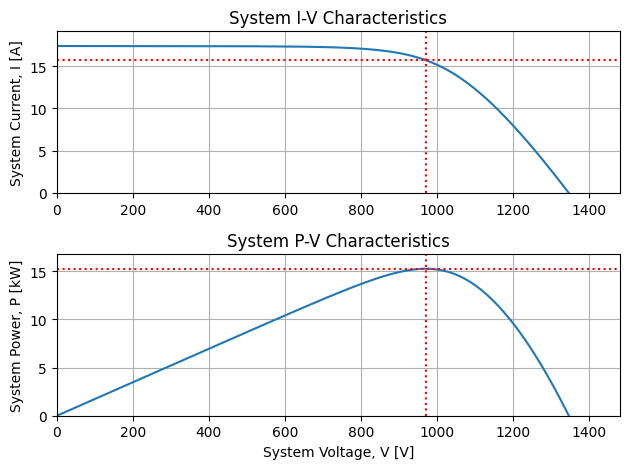

In [48]:
# Exponentially degraded Rs system
pvsys_Rs_degraded = create_Rs_degraded_system()
plot_pv_system(pvsys_Rs_degraded, title="Rs")
pvsys_Rs_degraded.plotSys()
plt.tight_layout()
plt.show()

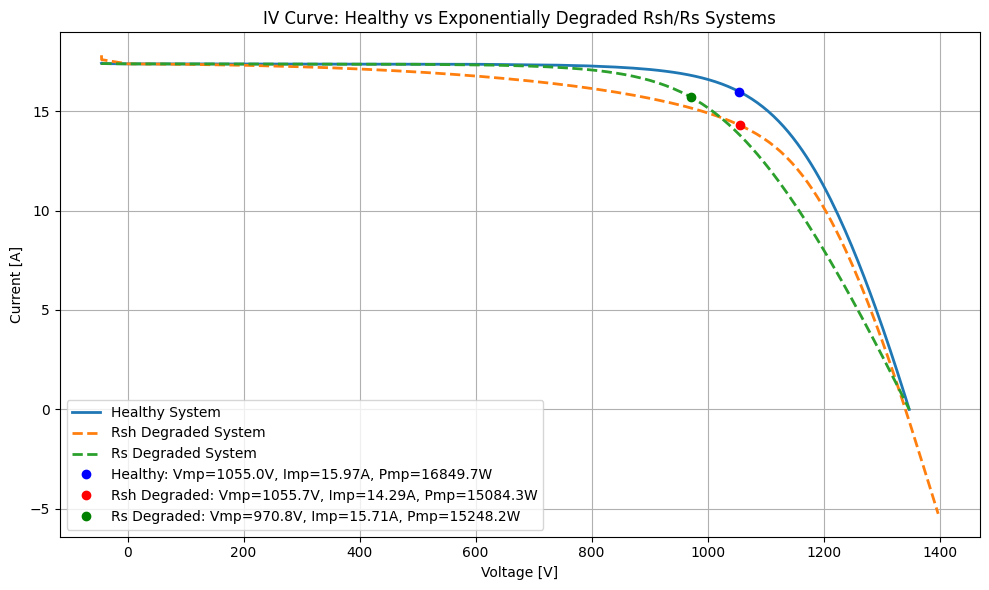

Healthy Pmp: 16849.723929502612
Rsh Degraded Pmp: 15084.32082027392
Rs Degraded Pmp: 15248.233127430683


In [49]:
# Prepare legend labels with Pmp info
label_healthy = (f"Healthy: Vmp={pvsys_healthy.Vmp:.1f}V, "
                 f"Imp={pvsys_healthy.Imp:.2f}A, Pmp={pvsys_healthy.Pmp:.1f}W")
label_Rsh_degraded = (f"Rsh Degraded: Vmp={pvsys_Rsh_degraded.Vmp:.1f}V, "
                  f"Imp={pvsys_Rsh_degraded.Imp:.2f}A, Pmp={pvsys_Rsh_degraded.Pmp:.1f}W")
label_Rs_degraded = (f"Rs Degraded: Vmp={pvsys_Rs_degraded.Vmp:.1f}V, "
                  f"Imp={pvsys_Rs_degraded.Imp:.2f}A, Pmp={pvsys_Rs_degraded.Pmp:.1f}W")

# Plot IV curves
plt.figure(figsize=(10,6))
plt.plot(pvsys_healthy.Vsys, pvsys_healthy.Isys, label="Healthy System", lw=2)
plt.plot(pvsys_Rsh_degraded.Vsys, pvsys_Rsh_degraded.Isys, label="Rsh Degraded System", lw=2, ls="--")
plt.plot(pvsys_Rs_degraded.Vsys, pvsys_Rs_degraded.Isys, label="Rs Degraded System", lw=2, ls="--")

# Highlight Pmp points
plt.plot(pvsys_healthy.Vmp, pvsys_healthy.Imp, 'o', color='blue', label=label_healthy)
plt.plot(pvsys_Rsh_degraded.Vmp, pvsys_Rsh_degraded.Imp, 'o', color='red', label=label_Rsh_degraded)
plt.plot(pvsys_Rs_degraded.Vmp, pvsys_Rs_degraded.Imp, 'o', color='g', label=label_Rs_degraded)

plt.xlabel("Voltage [V]")
plt.ylabel("Current [A]")
plt.title("IV Curve: Healthy vs Exponentially Degraded Rsh/Rs Systems")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print Pmp values
print("Healthy Pmp:", pvsys_healthy.Pmp)
print("Rsh Degraded Pmp:", pvsys_Rsh_degraded.Pmp)
print("Rs Degraded Pmp:", pvsys_Rs_degraded.Pmp)